#Financial Market News - Sentiment Analysis


Here is a dataset (dummy) of the top 25 financial market news for the day. The task is to train a model and predict the overall sentiment analysis.

#Import Library

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#Import Dataset

In [32]:
FM_data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Financial%20Market%20News.csv', encoding = "ISO-8859-1")

#Describe Data

In [41]:
FM_data.head()



,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [42]:
FM_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [43]:
FM_data.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#Data Visualization

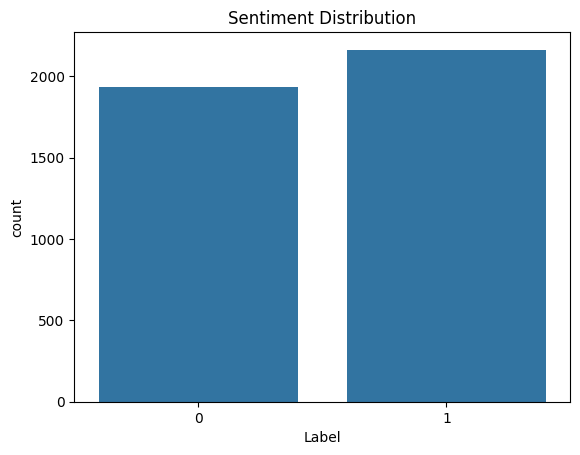

In [56]:

sns.countplot(x='Label', data=FM_data)
plt.title('Sentiment Distribution')
plt.show()

# Data Preprocessing

In [55]:
# Dropping missing values
FM_data = FM_data.dropna()

# Combine all news columns into a single text column
news_columns = ['News 1', 'News 2', 'News 3', 'News 4', 'News 5', 'News 6', 'News 7', 'News 8', 'News 9', 'News 10',
                'News 11', 'News 12', 'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18', 'News 19',
                'News 20', 'News 21', 'News 22', 'News 23', 'News 24', 'News 25']

FM_data['combined_news'] = FM_data[news_columns].apply(lambda x: ' '.join(x), axis=1)

# Text preprocessing (e.g., removing punctuation, converting to lowercase)
import string

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

FM_data['cleaned_text'] = FM_data['combined_news'].apply(preprocess_text)


<ipython-input-55-453a6c96c9ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FM_data['combined_news'] = FM_data[news_columns].apply(lambda x: ' '.join(x), axis=1)
<ipython-input-55-453a6c96c9ea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FM_data['cleaned_text'] = FM_data['combined_news'].apply(preprocess_text)


# Define Target Variable (y) and Feature Variables (X)

In [36]:
FM_data.columns


Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

In [57]:
X = FM_data['cleaned_text']
y = FM_data['Label']


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)


In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3278,), (820,), (3278,), (820,))

# Train Test Split

In [61]:
model = LogisticRegression()

#Modeling

In [64]:
# Using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

#Model Evaluation

              precision    recall  f1-score   support

           0       0.54      0.33      0.41       415
           1       0.51      0.72      0.60       405

    accuracy                           0.52       820
   macro avg       0.53      0.52      0.50       820
weighted avg       0.53      0.52      0.50       820



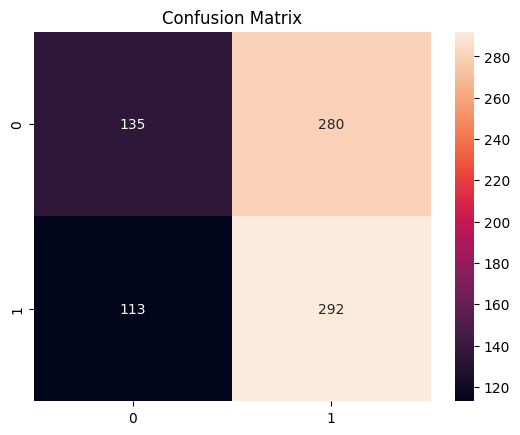

In [65]:
# Predictions
y_pred = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


#Prediction

In [66]:
new_data = ['The market is doing great today', 'There is a significant drop in stock prices']
new_data_cleaned = [preprocess_text(text) for text in new_data]
new_data_tfidf = tfidf.transform(new_data_cleaned)

predictions = model.predict(new_data_tfidf)
print(predictions)


[1. 0.]


**Explanation**

Imported necessary libraries for data manipulation, visualization, and modeling.
Loaded the dataset from the specified source and examined its structure.
Visualized the sentiment distribution to understand the data better.
Preprocessed the text data by combining all news columns into a single text column and cleaning the text.
Defined the target variable (y) and feature variables (X).
Split the data into training and testing sets to evaluate the model's performance.
Vectorized the text data using TF-IDF and trained a logistic regression model.
Evaluated the model's performance using classification metrics and a confusion matrix.
Made predictions on new data using the trained model.